In [124]:
import numpy as np
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc as pm   # type: ignore
import arviz as az   # type: ignore


In [ ]:
# ### Exercise 1 (max 3 points)
#
# The file [pigs.csv](./pigs.csv) (Koen, Erin, Newton, Erica, & Ellington, E. Hance. (2022). Data for: Evaluating potential sources of invasive wild pigs in Ontario. https://doi.org/10.5061/dryad.5dv41ns6j) contains data about a population of pigs.
#
# The columns have this meaning:
#
#  - PigType - type of pig sighting (domesticated, wild boar, unknown)
#  - DETECTED - 0 - random location, 1 - pig sighting
#  - dist_boar - distance (meters) to nearest known premise with wild boar (meters)
#  - dist_pig - distance (meters) to nearest known premise with domestic pig (meters)
#  - borderMI - distance (meters) to border with Michigan (excluding the upper peninsula)
#  - borderNY - distance (meters) to border with New York (meters)
#  - borderQC - distance (meters) to border with Quebec
#
#
# Load the data in a pandas dataframe and make a `bool` column `pig_sighting` which is `True` iff the pig was detected from a pig sighting site. Use the first column as index.

In [8]:
import pandas as pd
data = pd.read_csv('pigs.csv',index_col=[0])


In [10]:
data['pig_sighting'] = np.where(data['DETECTED'] ==1, True, False)


In [ ]:
# ### Exercise 2 (max 4 points)
#
# Make a figure with the three histograms of the distances from the borders. Add a proper title and a legend.
#

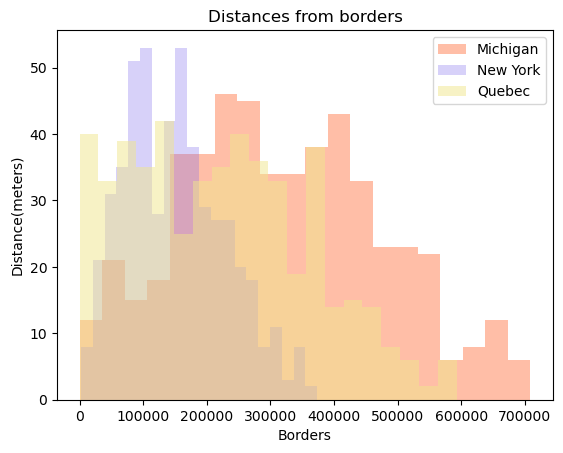

In [56]:
plt.hist(data['borderMI'], label='Michigan', alpha=0.5, color= 'coral', bins=20) #alpha transparency
plt.hist(data['borderNY'], label='New York', color='mediumslateblue', bins=20, alpha=0.3)
plt.hist(data['borderQC'], label='Quebec', color='khaki', bins=20, alpha=0.5)
plt.legend()

plt.xlabel('Borders')
plt.ylabel('Distance(meters)')
plt.title('Distances from borders')
plt.show()


In [ ]:
# ### Exercise 3 (max 7 points)
#
# Define a function `area` that takes the length of three radii (in **meters**) and computes the area (in square **kilometers**) of the circle with the maximum radius. For example if the three radii are 1000.0, 2000.0, and 3000.0 meters long, the area is  $9\pi$ square kilometers.
#
# To get the full marks, you should declare correctly the type hints and add a test within a doctest string.

In [29]:
import math 
from typing import Tuple #for typehints and docstring

def area(a,b,c):
    
    """This function calculates the area of the circle with the maximum radius.

    >>> area(1000.0, 2000.0, 3000.0)
    '28.27 square kilometers'

    :param a: float, radius in meters
    :param b: float, radius in meters
    :param c: float, radius in meters
    :return: str, area in square kilometers, rounded to 2 decimal places
    
    """
    area_a=math.pi*a*a
    area_b=math.pi*b*b
    area_c=math.pi*c*c
    
    max_area= max(area_a,area_b,area_c)
    return f'{max_area/10**6:.2f} square kilometers'

In [ ]:
# ### Exercise 4 (max 4 points)
#
# Add a column to the data with the `area` computed in the previous exercise, where the three radius are the distances from the border of Michigan, New York, and Quebec.
#
# To get the full marks avoid the use of explicit loops.

In [30]:
data['area'] = data.apply(lambda x: area(x['borderMI'], x['borderNY'], x['borderQC']), axis=1)


In [ ]:
# ### Exercise 5 (max 4 points)
#
# Print the mean `dist_boar` and the mean `dist_pig` for wild boars and domesticated detected in pig sighting sites. All domesticated (pot bellied or not) pigs should be considered together.

In [42]:
mean_dist_boar = data[(data['PigType'] == 'wild boar') & (data['pig_sighting'] == True)]['dist_boar'].mean()
mean_dist_pig = data[(data['PigType'].isin(['domesticated', 'domesticated - pot bellied'])) & (data['pig_sighting'] == True)]['dist_pig'].mean()


print (mean_dist_boar)
print (mean_dist_pig)


16259.398918565988
2959.3232887929953


In [ ]:

# ### Exercise 6 (max 3 points)
#
# Make a scatter plot of `dist_boar` vs. `dist_pig`. Pigs detected in a pig sighting site should appear in red, the others in blue.

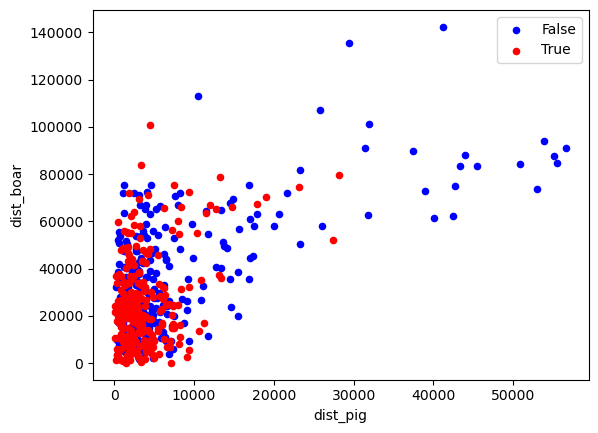

In [52]:
fig, ax = plt.subplots()

colors = {True:'red', False:'blue'}

          
grouped = data.groupby('pig_sighting')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='dist_pig', y='dist_boar', label=key, c=colors[key])

plt.show()

In [ ]:
# ### Exercise 7 (max 3 points)
#
# Sample 5 pigs among the "wild boars" and print, in ascending order of `dist_pig`, their `borderMI`.

In [122]:
data2 = data[data['PigType'] == 'wild boar'].sample(n=5).sort_values(by='dist_pig')
data2[['PigType', 'dist_pig', 'borderMI']]


,PigType,dist_pig,borderMI
235,wild boar,1708.267864,708940.155618
26,wild boar,3274.644168,668750.109500
164,wild boar,3560.692879,265858.421119
61,wild boar,4877.404607,163016.867315
234,wild boar,5600.046866,231993.314387


In [ ]:
# ### Exercise 8 (max 5 points)
#
# Consider this statistical model:
#
#
# - the `borderQC` distance for wild boars is normally distributed with mean $\mu$ and standard deviation $\sigma$
# - $\mu$ is normally distributed with mean $=170000$ and standard deviation $=100000$
# - $\sigma$ is exponentially distributed with $\lambda = 1$
#
# Code this model with pymc, sample the model, and print the summary of the resulting estimation by using `az.summary`.
#
#
#
#

In [ ]:
import pymc3 as pm

with pm.Model() as model:
    mu_mean = 170000
    mu_sd = 100000
    sigma_lambda = 1
    
    mu = pm.Normal('mu', mu=mu_mean, sd=mu_sd)
    sigma = pm.Exponential('sigma', lam=sigma_lambda)
    borderQC = pm.Normal('borderQC', mu=mu, sd=sigma, observed=data[(data['PigType'] == 'wild boar') & (data['pig_sighting'] == True)]['borderQC'])
    
    trace = pm.sample(300, tune=200)
    
    
az.summary(trace)

C:\Users\shwet\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\shwet\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\shwet\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\shwet\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS:

In [135]:
data['PigType'].value_counts()['wild boar']


20